# ■ 월드컵 데이터 : 미리보는 카타르 월드컵, 한국팀 분석
<hr/>

2014년의 브라질 월드컵, 2018년의 러시아 월드컵에 뒤이어 2022년 11월 20일, 카타르 월드컵이 시작했습니다.

우리는 항상 월드컵에서의 경기를 앞두고, 어떤 팀이 강팀이고 어떤 팀이 약팀인지 대략적인 감과 지식을 배경으로 추측을 하곤 합니다.

그러나 공만 골대 안에 넣으면 이기는 간단해보이는 스포츠인 축구에도 승패의 결정엔 정말 복잡하고 많은, 크고작은 요소들이 작용을 합니다.

단순히 강팀과 약팀의 경기라 하여도 무조건 강팀이 이기는 것이 아닌, 각 팀들의 강점, 약점, 상성, 전략, 선수들의 컨디션, 감독의 판단,

심지어는 날씨와 장소, 시간, 잔디의 컨디션까지도 승패에 정말 커다란 영향을 미칩니다.

저희는 문득 그러한 상관관계에 따른 승패 추측이 가능한지 궁금해졌고, 지금도 진행중인 카타르 월드컵을 더욱 재미있게 즐기고자

이번 빅데이터 프로젝트에서 아래와 같은 분석과 활동을 하기로 생각했습니다.

- 2014년, 2018년, 2022년 월드컵에 대한 대략적인 정보 분석
- 세 월드컵의 본선에 모두 출전한 팀들 중 데이터가 활발한 8개의 팀을 선정해 다양한 상태를 분석
- 그 8개 팀의 2022년 카타르 월드컵에서의 성적과 순위, 다른 팀들과의 경기 결과를 추측
- 한국 대표팀의 성적 및 세밀한 선수들을 디테일하게 분석하여 강점, 약점 및 다양한 정보를 분석하고 개선점 파악

In [66]:
# Pandas 라이브러리 임포트
import pandas as pd
from pandas import Series, DataFrame

# 시각화를 위한 matplotlib 임포트
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
%matplotlib inline
plt.rcParams["font.family"] = "Malgun Gothic"

# 1. 2014년, 2018년, 2022년에 모두 참여한 월드컵 국가대표 팀 파악
- 세 월드컵에 모두 참여한 팀을 찾아내고, 그 안에서 데이터가 활발한 팀 8개를 골라내보겠습니다.

In [20]:
# 2014, 2018, 2022 월드컵에 참여한 모든 팀을 나열
totalteam = pd.read_excel('data/나라별 월드컵 참가팀.xlsx')
totalteam

,2014,2018,2022
0,가나,나이지리아,가나
1,그리스,대한민국,네덜란드
2,나이지리아,덴마크,대한민국
3,네덜란드,독일,덴마크
4,대한민국,러시아,독일
5,독일,멕시코,멕시코
6,러시아,모로코,모로코
7,멕시코,벨기에,미국
8,미국,브라질,벨기에
9,벨기에,사우디아라비아,브라질


In [62]:
# 세 월드컵에 모두 참가한 팀만을 찾아내기

# 오름차순으로 계층색인 배열 만들기
data = (pd.concat([totalteam[2014], totalteam[2018], totalteam[2022]], axis = 0, ignore_index = False).value_counts() == 3).sort_index()
data_index = data.values

# 중복을 제거한 총 팀 리스트 만들기
team = pd.concat([totalteam[2014], totalteam[2018], totalteam[2022]], axis = 0, ignore_index = False).drop_duplicates().sort_values()
team.index = range(team.count())

# 결론적으로 참여하는 팀
result = team[data_index]
result.index = range(result.count())

print('본선에 진출했던 ', result.count(), '개의 팀')
result

본선에 진출했던  17 개의 팀


0      대한민국
1        독일
2       멕시코
3       벨기에
4       브라질
5       스위스
6       스페인
7     아르헨티나
8      우루과이
9        이란
10       일본
11     잉글랜드
12    코스타리카
13    크로아티아
14     포르투갈
15      프랑스
16       호주
dtype: object

저희는 이 17개 팀들의 지난 A매치 기록들을 살펴보았고,

경기들의 스테이터스를 구체적으로 구할 수 있으며 분석할 가치가 있는 팀만을 토론해 **총 8개의 팀**을 추렸습니다.


1. 독일
2. 벨기에
3. 스위스
4. 스페인
5. 잉글랜드
6. 크로아티아
7. 포르투갈
8. 프랑스

(0.0, 3.0)

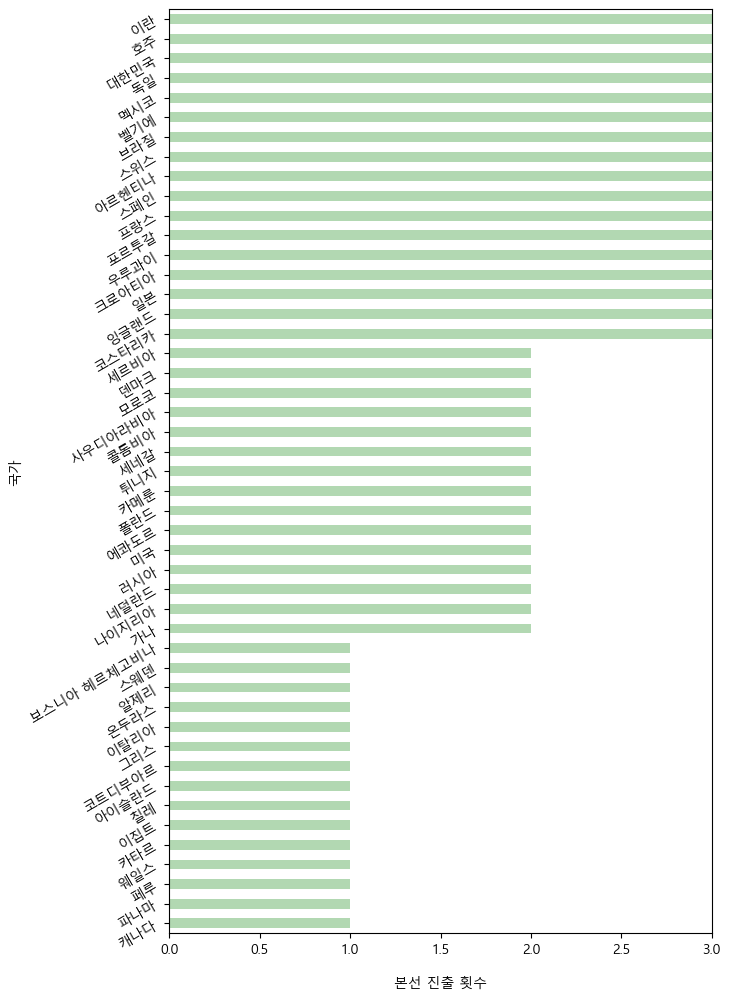

In [113]:
# 추가적으로 세 월드컵의 본선에 진출한 나라들과 진출한 수 시각화
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7,12)

data = pd.concat([totalteam[2014], totalteam[2018], totalteam[2022]], axis = 0, ignore_index = False).value_counts().sort_values(ascending = True)
data.plot(kind = 'barh',color = 'green', alpha = 0.3)
plt.xlabel('본선 진출 횟수', labelpad=15)
plt.ylabel('국가')
plt.yticks(rotation=30)
plt.xlim([0, 3])

# 2. 2014년, 2018년, 2022년 월드컵의 대략적인 정보 분석
- 세 월드컵의 다양한 정보들을 가지고 간단한 분석 활동을 해보겠습니다.

In [120]:
world_cups = pd.read_csv('data/WorldCups.csv')
world_cups

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375000
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Russia,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753
